In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('financial_data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [5]:
dataset2 = dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

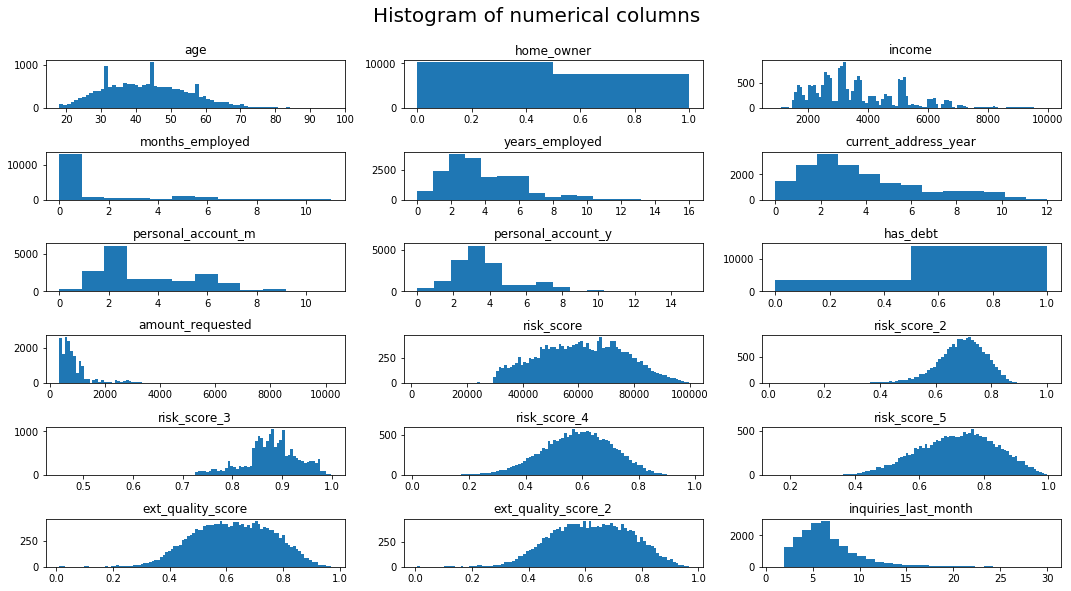

In [6]:
fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical columns",fontsize=20)
for i in range (dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:,i].unique())
    if vals >100:
        vals = 100
    plt.hist(dataset2.iloc[:,i],bins= vals)
plt.tight_layout(rect=[0,0.3,1,0.95])

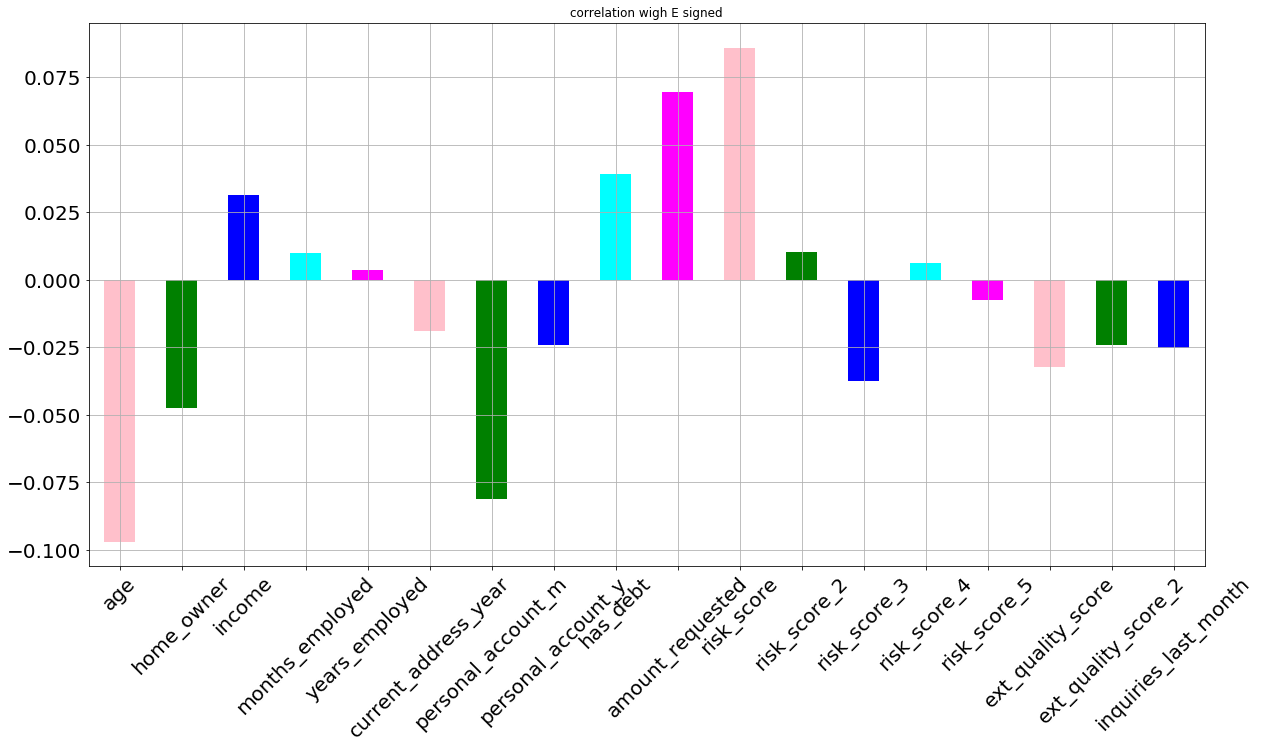

In [7]:
dataset2.corrwith(dataset.e_signed).plot.bar(
          figsize=(20,10),title="correlation wigh E signed",fontsize=20,
          rot=45,grid= True,color=['pink','green','blue','cyan','magenta'])

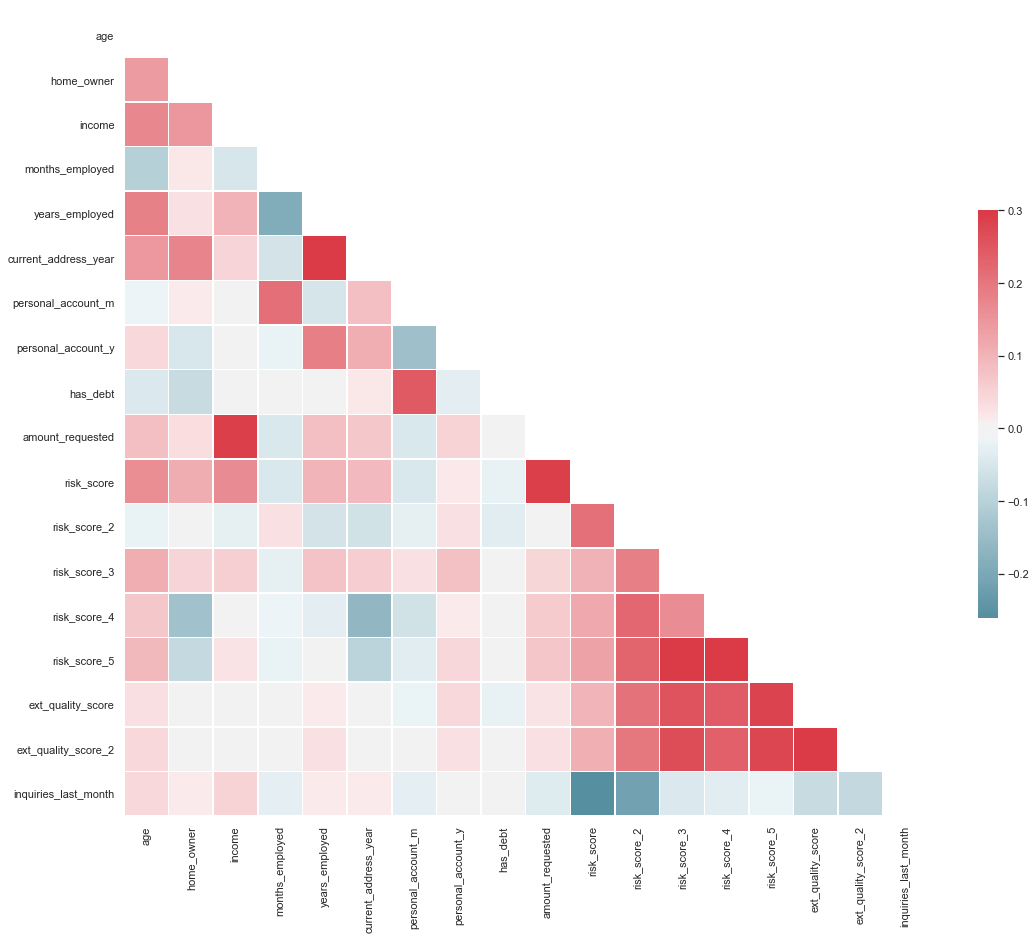

In [8]:
sns.set(style='white')

corr = dataset2.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax=plt.subplots(figsize=(18,15))

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask = mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={"shrink":.5})

In [9]:
import random
import time

In [10]:
random.seed(100)

Feature Engineering

In [11]:
dataset = dataset.drop(columns=['months_employed'])

In [12]:
dataset['personal_account_months']=(dataset.personal_account_m+(dataset.personal_account_y *12))

In [13]:
dataset[['personal_account_m','personal_account_y','personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [14]:
dataset = dataset.drop(columns=['personal_account_m','personal_account_y'])

One Hot Encoding

In [15]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [16]:
dataset = dataset.drop(columns=['pay_schedule_semi-monthly'])

In [17]:
response=dataset["e_signed"]
users = dataset["entry_id"]
dataset = dataset.drop(columns=['e_signed','entry_id'])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,response,test_size=0.2,random_state=0)


In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))


C:\Users\bpava\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bpava\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\bpava\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [20]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test2.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [21]:
X_train = X_train2
X_test = X_test2

Model Building

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
classifier = LogisticRegression(random_state=0,penalty='l1')

In [24]:
classifier.fit(X_train,y_train)

C:\Users\bpava\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

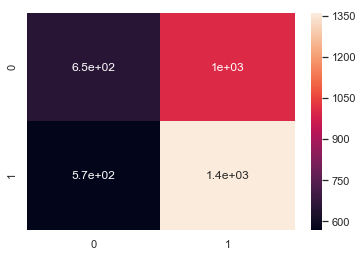

In [27]:
sns.heatmap(cm,annot=True)

In [28]:
print(cr)

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1654
           1       0.58      0.71      0.63      1928

   micro avg       0.56      0.56      0.56      3582
   macro avg       0.56      0.55      0.54      3582
weighted avg       0.56      0.56      0.55      3582



SVM

In [29]:
from sklearn.svm import SVC
classifier = SVC(random_state=0,kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.55      0.37      0.44      1654
           1       0.58      0.74      0.65      1928

   micro avg       0.57      0.57      0.57      3582
   macro avg       0.56      0.55      0.55      3582
weighted avg       0.56      0.57      0.55      3582



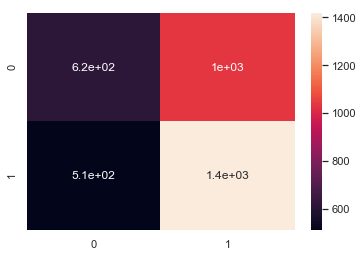

In [30]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cr)

In [31]:
from sklearn.svm import SVC
classifier = SVC(random_state=0,kernel='rbf')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1654
           1       0.61      0.69      0.65      1928

   micro avg       0.59      0.59      0.59      3582
   macro avg       0.59      0.58      0.58      3582
weighted avg       0.59      0.59      0.59      3582



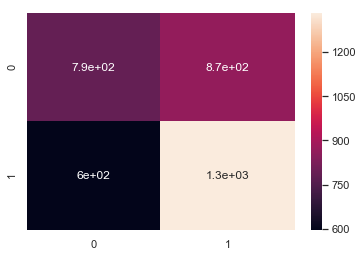

In [32]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cr)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1654
           1       0.64      0.68      0.66      1928

   micro avg       0.62      0.62      0.62      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.62      0.62      0.62      3582



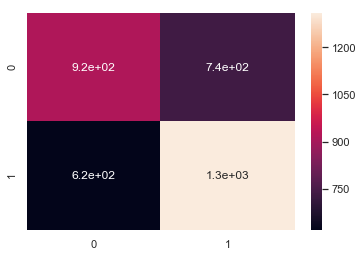

In [34]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cr)

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("RFCA: %0.2f(+/- %0.2f)" %(accuracies.mean(),accuracies.std()*2))

RFCA: 0.63(+/- 0.03)
